## Apprentissage par perceptron multi-couche ##

#### Préparation du jeu de données 

In [72]:
#Charger le jeu de données MNIST

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', as_frame=False)

In [73]:
#Diviser la base de données en 49000 lignes pour l’apprentissage (training) et le reste pour les tests

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
data = mnist.data
target = mnist.target

pourcentage_de_données = 0.7
xtrain,  xtest,  ytrain,  ytest  =  train_test_split(data,  target, train_size = pourcentage_de_données)

#### Premiers Tests 

In [5]:
#Construire un modèle de classification ayant comme paramètre : 
# hidden_layer_sizes = (50), puis calculez la précession du classifieur 

clf = MLPClassifier( max_iter=300, hidden_layer_sizes=(50)).fit(xtrain, ytrain)
print(clf.score(xtest, ytest))

0.9525714285714286


Actual :  9
Prediction :  ['9']


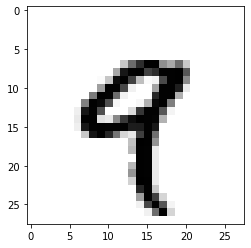

In [8]:
# Afficher la classe de l’image 4 et sa classe prédite

print("Actual : ", target[4])
print("Prediction : ", clf.predict([data[4]]))
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4], cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show()

In [11]:
#Calculez la précession

from sklearn.metrics import precision_score
precision = precision_score(mnist.target, clf.predict(data) ,average='micro')
print(precision)

0.9740857142857143


### Analyse

In [74]:
#On echantillonne pour faciliter les tests car les temps d'éxecution sont conséquents
indexs = np.random.randint(len(mnist.data), size= 7000)
data = np.array([mnist.data[i] for i in indexs])
target = np.array([mnist.target[i] for i in indexs])

pourcentage_de_données = 0.7
xtrain,  xtest,  ytrain,  ytest = train_test_split(data, target, train_size = pourcentage_de_données)

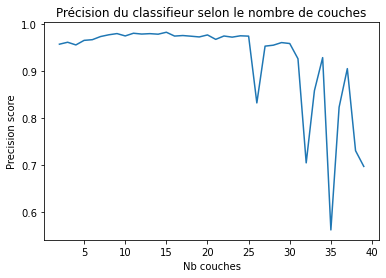

In [35]:
# Varier le nombre de couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur. 
import numpy as np
from matplotlib import pyplot as plt

layer=[50]
x = []
y = []

for i in np.arange(2,40):
    layer.append(50)
    clf = MLPClassifier(hidden_layer_sizes=tuple(layer), max_iter=100).fit(xtrain, ytrain)
    precision_t=precision_score(target, clf.predict(data), average='micro')
    #print("Nb Couche :", i, "Precision Score :", precision_t)
    x.append(i)
    y.append(precision_t)
        
plt.title('Précision du classifieur selon le nombre de couches')
plt.xlabel('Nb couches')
plt.ylabel('Precision score')
plt.plot(x,y)
plt.show()

Après observation sur un test de 1 à 100 couches on voit que le score baisse drastiquement à partir d'environ 30 couches, nous avons donc reploter pour une meilleure observation de 2 à 40)

In [33]:
# Fonction pour créer un model random avec un nombre de couches cachées max et une taille de couche max
def create_model(nb_max, size_max):
    nb_layer = np.random.randint(low = 1, high = nb_max)
    layers = np.random.randint(low = 10, high = size_max, size =nb_layer)
    
    model = MLPClassifier(hidden_layer_sizes = layers)
    return model

In [34]:
create_model(10, 300)

MLPClassifier(hidden_layer_sizes=array([109, 182, 180, 194, 158, 248]))

On crée ici 5 modèles de manière aléatoire et on récupère leur temps d'éxecution ainsi que leur score de précision

In [40]:
import time

for i in np.arange(1,6):
    start = time.time()
    mdl = create_model(10,300)
    clf = mdl.fit(xtrain, ytrain)
    precision_t=precision_score(target, clf.predict(data), average='micro')
    end = time.time()
    tps = end-start
    print('Model', i, ' ', mdl)
    print('Execution Time: ', tps, '    Precision Score: ', precision_t)



Model 1   MLPClassifier(hidden_layer_sizes=array([134,  28,  40,  15, 184, 127]))
Execution Time:  5.04253625869751     Precision Score:  0.9745714285714285
Model 2   MLPClassifier(hidden_layer_sizes=array([133, 124, 128, 202,  56, 235,  47]))
Execution Time:  6.479150056838989     Precision Score:  0.9802857142857143
Model 3   MLPClassifier(hidden_layer_sizes=array([229, 271, 147, 233,  50, 126, 170,  58]))
Execution Time:  7.607504367828369     Precision Score:  0.9814285714285714
Model 4   MLPClassifier(hidden_layer_sizes=array([281, 237, 213, 178,  94]))
Execution Time:  7.232720851898193     Precision Score:  0.9777142857142858
Model 5   MLPClassifier(hidden_layer_sizes=array([ 69, 261,  15,  70,  64]))
Execution Time:  3.6618196964263916     Precision Score:  0.973


#### Analyse des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam. 

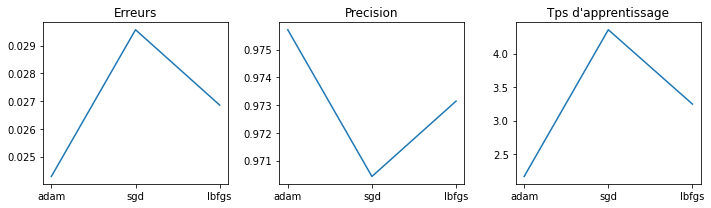

In [115]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import recall_score

algos = ['adam', 'sgd', 'lbfgs']

# Paramètres communs :
layers = [50, 50 ,50 ,50 ,50 ,50 ,50 ,50]
errors = []
recalls = []
precisions = []
times = []

for algo in algos:
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes = layers, solver = algo).fit(xtrain, ytrain)
    end = time.time()
    recall = recall_score(target, clf.predict(data), average = 'micro')
    pr_score = precision_score(target, clf.predict(data), average='micro')
    error = zero_one_loss(target, clf.predict(data))
    tps = end-start
    
    errors.append(error)
    recalls.append(recall)
    precisions.append(pr_score)
    times.append(tps)

fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(algos, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(algos, precisions) 
ax[1].set_title('Precision') 
  
ax[2].plot(algos, times) 
ax[2].set_title('Tps d\'apprentissage') 
    
plt.tight_layout()
plt.show()



#### Analyse des fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

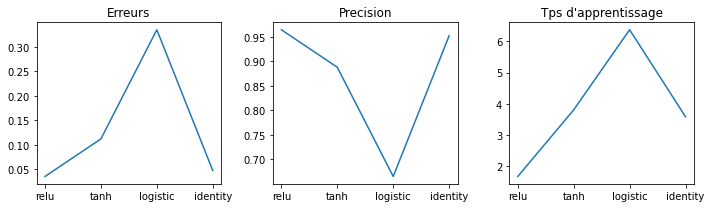

In [117]:
fcts = ['relu', 'tanh', 'logistic', 'identity']
# Paramètres communs :
layers = [50, 50 ,50 ,50 ,50 ,50 ,50 ,50]
errors = []
recalls = []
precisions = []
times = []

for fct in fcts:
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes = layers, solver = 'adam', activation = fct).fit(xtrain, ytrain)
    end = time.time()
    recall = recall_score(target, clf.predict(data), average = 'micro')
    pr_score = precision_score(target, clf.predict(data), average='micro')
    error = zero_one_loss(target, clf.predict(data))
    tps = end-start
    
    errors.append(error)
    recalls.append(recall)
    precisions.append(pr_score)
    times.append(tps)
    
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(fcts, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(fcts, precisions) 
ax[1].set_title('Precision') 
  
ax[2].plot(fcts, times) 
ax[2].set_title('Tps d\'apprentissage') 
    
plt.tight_layout()
plt.show()



#### Analyse de la valeur de la régularisation L2 (paramètre α)

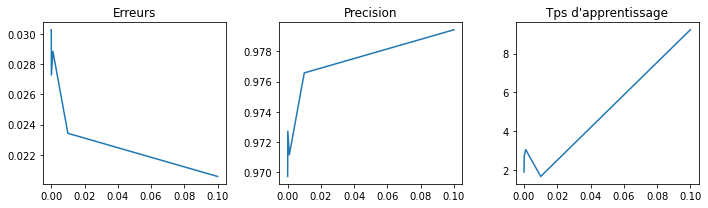

In [118]:
# Paramètres communs :
layers = [50, 50 ,50 ,50 ,50 ,50 ,50 ,50]
errors = []
recalls = []
precisions = []
times = []
alphas = [10**(-i) for i in range(5,0,-1)]

for alfa in alphas :
    start = time.time()
    clf = MLPClassifier(hidden_layer_sizes = layers, solver = 'adam', activation = 'relu', alpha = alfa).fit(xtrain, ytrain)
    end = time.time()
    recall = recall_score(target, clf.predict(data), average = 'micro')
    pr_score = precision_score(target, clf.predict(data), average='micro')
    error = zero_one_loss(target, clf.predict(data))
    tps = end-start
    
    errors.append(error)
    recalls.append(recall)
    precisions.append(pr_score)
    times.append(tps)
    
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(alphas, errors) 
ax[0].set_title('Erreurs') 

ax[1].plot(alphas, precisions) 
ax[1].set_title('Precision') 

ax[2].plot(alphas, times) 
ax[2].set_title('Tps d\'apprentissage') 

plt.tight_layout()
plt.show()


#### Matrice de confusion

In [75]:
from sklearn.metrics import confusion_matrix

clf = MLPClassifier(hidden_layer_sizes = layers, solver = 'adam', activation = 'relu', alpha = 0.1).fit(xtrain, ytrain)
cm = confusion_matrix(target, clf.predict(data))

<AxesSubplot:>

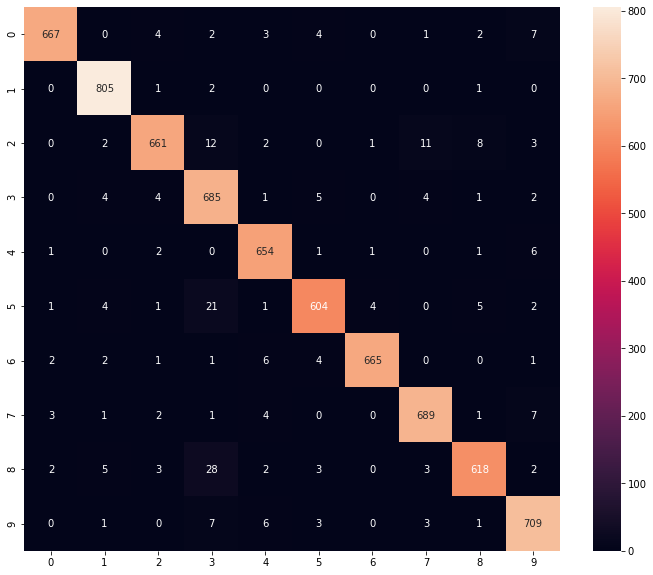

In [79]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (12,10))
sn.heatmap(df_cm, annot=True, fmt = 'd')